In [28]:
from google.colab import drive
import numpy as np
import json
from glob import glob
import cv2

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
keypoints = '/content/drive/MyDrive/animalPoseData/keypoints.json'

In [31]:
imagesPaths = []
for path in glob("/content/drive/MyDrive/animalPoseData/images/*"):
        imagesPaths.append(path)

In [32]:
with open(keypoints) as f:
    d = json.load(f)

In [33]:
def achar_caminho_da_imagem(imageName, imagesPaths):
  for caminho in imagesPaths:
        if caminho.endswith(f"/{imageName}"):
            return caminho

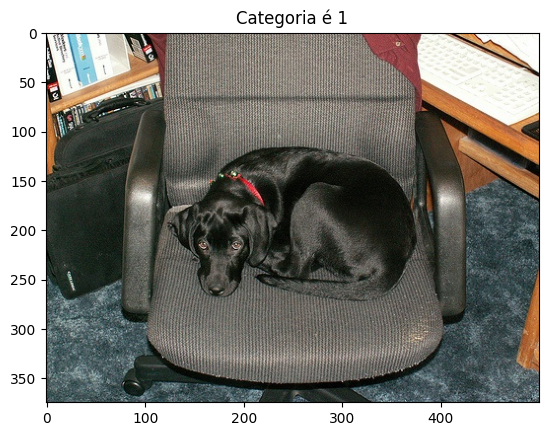

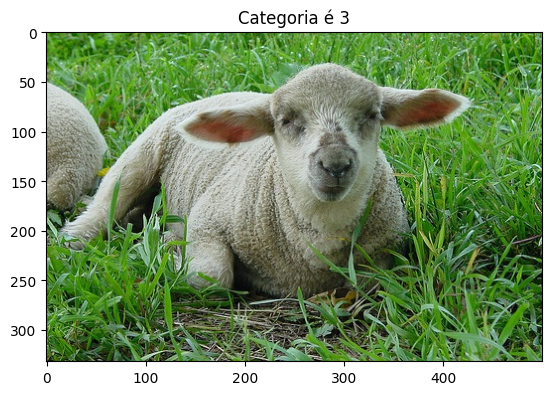

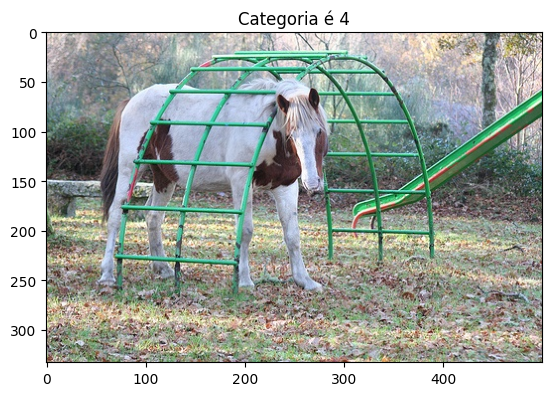

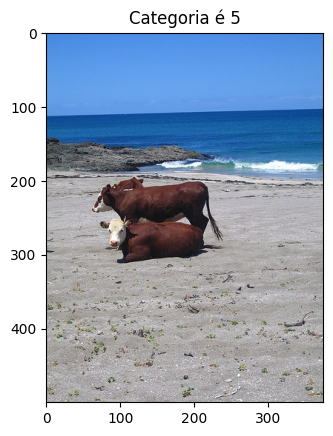

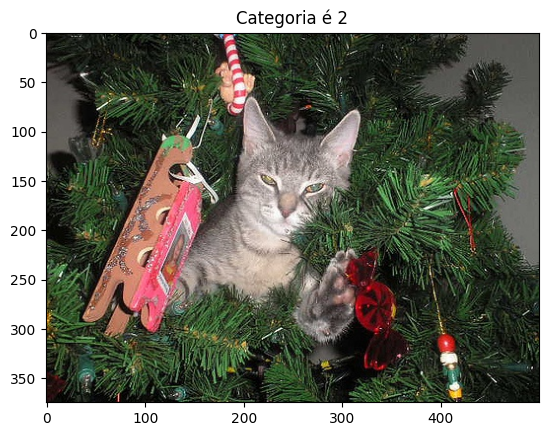

In [34]:
import matplotlib.pyplot as plt
usedCategories = []
annotations = d.get("annotations")
imagesDict = d.get("images")
numberCategories = [0,0,0,0,0]
imageSizes = {}

for annotation in annotations:
  category = annotation.get("category_id")
  if category not in usedCategories:
    imageId = annotation.get("image_id")
    imageName = imagesDict.get(str(imageId))
    path = achar_caminho_da_imagem(imageName, imagesPaths)
    img = cv2.imread(path)
    imagemTeste = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(f"Categoria é {category}")
    plt.imshow(imagemTeste)
    plt.show()
    usedCategories.append(category)
  numberCategories[category - 1] += 1


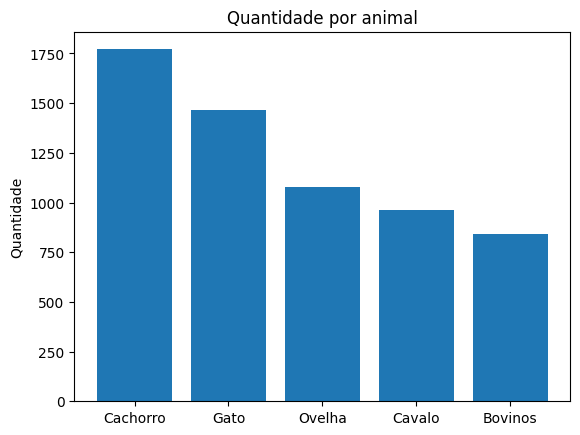

In [35]:
indices = ["Cachorro", "Gato", "Ovelha", "Cavalo", "Bovinos"]
plt.bar(indices, numberCategories)
plt.ylabel('Quantidade')
plt.title('Quantidade por animal')
plt.show()

In [46]:
print(numberCategories)

[1771, 1466, 1078, 960, 842]


In [36]:
caminhosBovinos = []
for annotation in annotations:
  category = annotation.get("category_id")
  if category == 5:
    imageId = annotation.get("image_id")
    imageName = imagesDict.get(str(imageId))
    path = achar_caminho_da_imagem(imageName, imagesPaths)
    caminhosBovinos.append(path)

In [37]:
images = []
imageShape = []
for path in caminhosBovinos:
  img = cv2.imread(path)
  images.append(img)
  imageShape.append(img.shape)

In [38]:
altura = [t[0] for t in imageShape]

largura = [t[1] for t in imageShape]

print(f"altura min: {min(altura)} altura max: {max(altura)}")
print(f"largura min: {min(largura)} largura max: {max(largura)}")

altura min: 141 altura max: 500
largura min: 192 largura max: 500


In [39]:
from collections import Counter

frequenciaLargura = Counter(largura)
frequenciaAltura = Counter(altura)

print(frequenciaLargura)
print(frequenciaAltura)

Counter({500: 556, 300: 184, 375: 29, 448: 9, 450: 7, 333: 6, 334: 5, 347: 4, 370: 4, 429: 3, 480: 3, 332: 2, 374: 2, 432: 2, 200: 2, 260: 2, 474: 1, 481: 1, 216: 1, 281: 1, 326: 1, 441: 1, 362: 1, 353: 1, 350: 1, 257: 1, 282: 1, 192: 1, 267: 1, 225: 1, 201: 1, 199: 1, 287: 1, 270: 1, 269: 1, 238: 1, 271: 1, 221: 1})
Counter({375: 283, 333: 77, 500: 65, 200: 25, 225: 23, 332: 21, 334: 18, 300: 17, 338: 13, 336: 10, 309: 9, 213: 8, 214: 8, 199: 8, 194: 8, 335: 7, 377: 7, 363: 7, 206: 6, 249: 6, 226: 6, 351: 5, 273: 5, 197: 5, 220: 5, 315: 4, 388: 4, 252: 4, 357: 4, 208: 4, 190: 4, 397: 3, 360: 3, 358: 3, 396: 3, 371: 3, 373: 3, 407: 3, 308: 3, 420: 3, 327: 3, 378: 3, 202: 3, 242: 3, 215: 3, 209: 3, 224: 3, 212: 3, 219: 3, 169: 3, 412: 2, 322: 2, 292: 2, 381: 2, 352: 2, 404: 2, 342: 2, 370: 2, 340: 2, 244: 2, 417: 2, 283: 2, 463: 2, 356: 2, 364: 2, 171: 2, 355: 2, 331: 2, 198: 2, 235: 2, 230: 2, 221: 2, 185: 2, 248: 2, 207: 2, 178: 2, 195: 2, 229: 2, 217: 2, 314: 1, 376: 1, 446: 1, 324: 

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  8%|▊         | 1/12 [00:01<00:11,  1.03s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 17%|█▋        | 2/12 [00:02<00:13,  1.33s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 25%|██▌       | 3/12 [00:04<00:14,  1.62s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

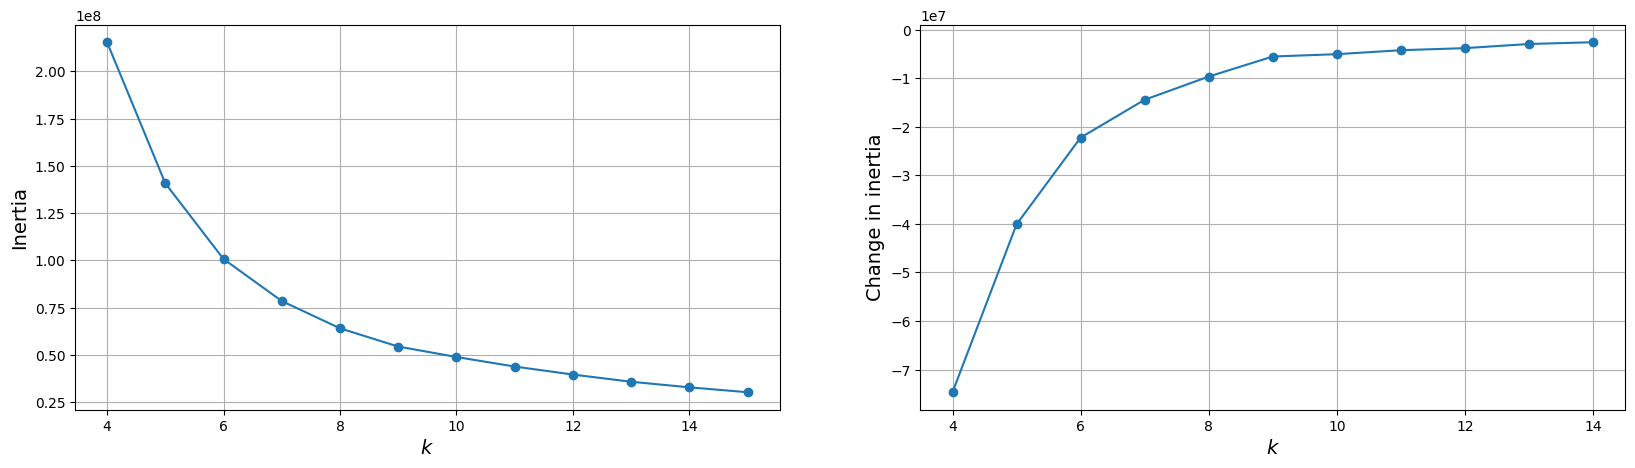

In [40]:
from sklearn.cluster import KMeans
import tqdm

testImage = images[0]

vectorized_img = testImage.reshape((-1,3))
vectorized_img = np.float32(vectorized_img)

n_clusters = list(range(4, 15 + 1, 1))

kmeans = []
inertias = []

for i in tqdm.trange(len(n_clusters)):
    kmeans.append(KMeans(n_clusters = n_clusters[i], random_state = 42))

    kmeans[-1].fit(vectorized_img)

    inertias.append(kmeans[-1].inertia_)

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertias, "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_clusters[:-1], np.diff(inertias), "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Change in inertia", fontsize = 14)
plt.grid(True)

plt.show()

In [47]:
def kmeansImagem(img, k, attempts):
    vectorized_img = img.reshape((-1,3))
    vectorized_img = np.float32(vectorized_img)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    ret, label, center = cv2.kmeans(vectorized_img, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)

    res = center[label.flatten()]
    result_image = res.reshape((img.shape))

    return result_image

In [48]:
k = 9
imagensProcessadas = []

for img in images:
  kmeansImage = kmeansImagem(img, k, 2)

  normalized_img = cv2.normalize(kmeansImage, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

  imagensProcessadas.append(normalized_img)


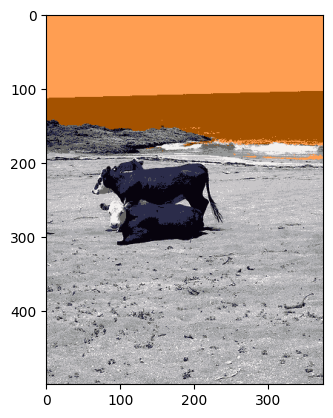

In [50]:
plt.imshow(imagensProcessadas[0])

plt.show()

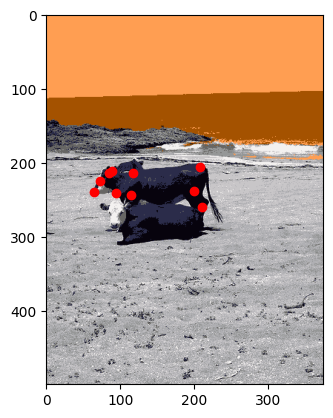

In [49]:
plt.imshow(imagensProcessadas[0])

pontos = d.get("annotations")[5].get('keypoints')

for ponto in pontos:
  if ponto[0] != 0 and ponto[1] != 0:
    plt.plot(ponto[0], ponto[1], 'ro')

plt.show()

In [64]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')
test_path = '/content/drive/MyDrive/animalPoseData/images/2007_000392.jpg'

results = model(source=test_path, show=True, conf=0.3)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/animalPoseData/images/2007_000392.jpg: 448x640 2 persons, 244.7ms
Speed: 3.4ms preprocess, 244.7ms inference, 36.5ms postprocess per image at shape (1, 3, 448, 640)


[
  {
    "name": "person",
    "class": 0,
    "confidence": 0.7832,
    "box": {
      "x1": 0.386,
      "y1": 0.16566,
      "x2": 0.57,
      "y2": 0.59036
    },
    "keypoints": {
      "x": [
        0.557919979095459,
        0.5593100190162659,
        0.5503799915313721,
        0.0,
        0.5298500061035156,
        0.5517500042915344,
        0.5046200156211853,
        0.5460500121116638,
        0.5059599876403809,
        0.5452799797058105,
        0.5334299802780151,
        0.5,
        0.46213001012802124,
        0.5360299944877625,
        0.46435999870300293,
        0.508679986000061,
        0.40900999307632446
      ],
      "y": [
        0.22821000218391418,
        0.217849999666214,
        0.21776999533176422,
        0.0,
        0.2227099984884262,
        0.27428001165390015,
        0.26622000336647034,
        0.36063000559806824,
        0.3555000126361847,
        0.4203599989414215,
        0.4237000048160553,
        0.38199999928474426,
      

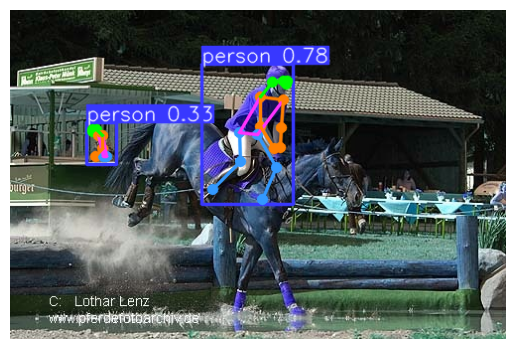

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your results object is named 'results'
for r in results:
    print(r.tojson(normalize=True))
    # r.save_crop(save_dir='sample')
    image_array = r.plot(conf=True, boxes=True)

    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

In [66]:
model = YOLO('yolov8n-pose.pt')
test_path = '/content/drive/MyDrive/animalPoseData/images/2007_000464.jpg'

results = model(source=test_path, show=True, conf=0.3)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/animalPoseData/images/2007_000464.jpg: 640x480 (no detections), 234.2ms
Speed: 6.1ms preprocess, 234.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


[]


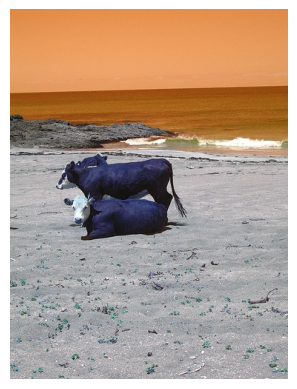

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your results object is named 'results'
for r in results:
    # r.save_crop(save_dir='sample')
    image_array = r.plot(conf=True, boxes=True)

    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()